In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs

import alexas_functions
# alexas_functions.list_my_functions()

In [2]:
pwd = 'C:\\Users\\alexa\\Documents\\RESEARCH\\tamu_projects'

In [3]:
### --- OPEN DATA
## open a had file (single ensemble member)
had_sat_sst_name = alexas_functions.get_filename('had_ensm', 'tas', omtype='obs')
print('observation dataset:\n', had_sat_sst_name)
had_sat_sst = xr.open_dataset(had_sat_sst_name)
had_sat_sst.close() ## close the file
had_sat_sst = alexas_functions.uniform_coords(had_sat_sst, ['latitude','longitude'])

## open an mpi single ensemble member file for the historical simulation 
mpi_tas_hist_name= alexas_functions.get_filename('mpi_ensm', 'tas')
mpi_tas_hist = xr.open_dataset(mpi_tas_hist_name)
mpi_tas_hist.close()
print('model historical dataset:\n', mpi_tas_hist_name)

## open the corresponding mpi ensemble member file for the simulated projection
mpi_tas_rcp85_name= alexas_functions.get_filename('mpi_ensm', 'tas', exp='rcp85')
mpi_tas_rcp85 = xr.open_dataset(mpi_tas_rcp85_name)
mpi_tas_rcp85.close()
print('model projection dataset:\n', mpi_tas_rcp85_name)

## merge the files 
mpi_tas = xr.merge([mpi_tas_hist, mpi_tas_rcp85])
mpi_tas = alexas_functions.uniform_coords(mpi_tas)
print('model datasets merged')

observation dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\had_ensm\Version_4.6\temperature_anomaly\HadCRUT.4.6.0.0.anomalies.1.nc
model historical dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_historical_r001i1850p3_185001-200512.nc
model projection dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_rcp85_r001i2005p3_200601-209912.nc
model datasets merged


In [4]:
had_sat_sst

<xarray.Dataset>
Dimensions:              (lat: 36, lon: 72, time: 2047)
Coordinates:
  * lat                  (lat) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                  (lon) float32 -177.5 -172.5 -167.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-0...
Data variables:
    temperature_anomaly  (time, lat, lon) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 surface temperature ensemble data
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 27/08/2020 14:34:42
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  1

In [5]:
mpi_tas

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 3000)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2099-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2100-01-01
    lat_bnds   (lat, bnds) float64 -89.5 -87.65 -87.65 ... 87.65 87.65 89.5
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    tas        (time, lat, lon) float32 241.85086 241.78836 ... 269.65988

In [6]:
mpi_percents = np.loadtxt(f'{pwd}\\Ocean_Percents_Grids\\MPI_OceanPercents.txt')
had_percents = np.loadtxt(f'{pwd}\\Ocean_Percents_Grids\\Had_OceanPercents.txt')

In [7]:
mpi_tas_obs = alexas_functions.mask_for_available_obs(mpi_tas['tas'], had_sat_sst['temperature_anomaly'])

1850-01-16T12:00:00.000000000
1850-02-15T00:00:00.000000000
1850-03-16T12:00:00.000000000
1850-04-16T00:00:00.000000000
1850-05-16T12:00:00.000000000
1850-06-16T00:00:00.000000000
1850-07-16T12:00:00.000000000
1850-08-16T12:00:00.000000000
1850-09-16T00:00:00.000000000
1850-10-16T12:00:00.000000000
1850-11-16T00:00:00.000000000
1850-12-16T12:00:00.000000000
1851-01-16T12:00:00.000000000
1851-02-15T00:00:00.000000000
1851-03-16T12:00:00.000000000
1851-04-16T00:00:00.000000000
1851-05-16T12:00:00.000000000
1851-06-16T00:00:00.000000000
1851-07-16T12:00:00.000000000
1851-08-16T12:00:00.000000000
1851-09-16T00:00:00.000000000
1851-10-16T12:00:00.000000000
1851-11-16T00:00:00.000000000
1851-12-16T12:00:00.000000000
1852-01-16T12:00:00.000000000
1852-02-15T12:00:00.000000000
1852-03-16T12:00:00.000000000
1852-04-16T00:00:00.000000000
1852-05-16T12:00:00.000000000
1852-06-16T00:00:00.000000000
1852-07-16T12:00:00.000000000
1852-08-16T12:00:00.000000000
1852-09-16T00:00:00.000000000
1852-10-16

1872-11-16T00:00:00.000000000
1872-12-16T12:00:00.000000000
1873-01-16T12:00:00.000000000
1873-02-15T00:00:00.000000000
1873-03-16T12:00:00.000000000
1873-04-16T00:00:00.000000000
1873-05-16T12:00:00.000000000
1873-06-16T00:00:00.000000000
1873-07-16T12:00:00.000000000
1873-08-16T12:00:00.000000000
1873-09-16T00:00:00.000000000
1873-10-16T12:00:00.000000000
1873-11-16T00:00:00.000000000
1873-12-16T12:00:00.000000000
1874-01-16T12:00:00.000000000
1874-02-15T00:00:00.000000000
1874-03-16T12:00:00.000000000
1874-04-16T00:00:00.000000000
1874-05-16T12:00:00.000000000
1874-06-16T00:00:00.000000000
1874-07-16T12:00:00.000000000
1874-08-16T12:00:00.000000000
1874-09-16T00:00:00.000000000
1874-10-16T12:00:00.000000000
1874-11-16T00:00:00.000000000
1874-12-16T12:00:00.000000000
1875-01-16T12:00:00.000000000
1875-02-15T00:00:00.000000000
1875-03-16T12:00:00.000000000
1875-04-16T00:00:00.000000000
1875-05-16T12:00:00.000000000
1875-06-16T00:00:00.000000000
1875-07-16T12:00:00.000000000
1875-08-16

1896-05-16T12:00:00.000000000
1896-06-16T00:00:00.000000000
1896-07-16T12:00:00.000000000
1896-08-16T12:00:00.000000000
1896-09-16T00:00:00.000000000
1896-10-16T12:00:00.000000000
1896-11-16T00:00:00.000000000
1896-12-16T12:00:00.000000000
1897-01-16T12:00:00.000000000
1897-02-15T00:00:00.000000000
1897-03-16T12:00:00.000000000
1897-04-16T00:00:00.000000000
1897-05-16T12:00:00.000000000
1897-06-16T00:00:00.000000000
1897-07-16T12:00:00.000000000
1897-08-16T12:00:00.000000000
1897-09-16T00:00:00.000000000
1897-10-16T12:00:00.000000000
1897-11-16T00:00:00.000000000
1897-12-16T12:00:00.000000000
1898-01-16T12:00:00.000000000
1898-02-15T00:00:00.000000000
1898-03-16T12:00:00.000000000
1898-04-16T00:00:00.000000000
1898-05-16T12:00:00.000000000
1898-06-16T00:00:00.000000000
1898-07-16T12:00:00.000000000
1898-08-16T12:00:00.000000000
1898-09-16T00:00:00.000000000
1898-10-16T12:00:00.000000000
1898-11-16T00:00:00.000000000
1898-12-16T12:00:00.000000000
1899-01-16T12:00:00.000000000
1899-02-15

1919-07-16T12:00:00.000000000
1919-08-16T12:00:00.000000000
1919-09-16T00:00:00.000000000
1919-10-16T12:00:00.000000000
1919-11-16T00:00:00.000000000
1919-12-16T12:00:00.000000000
1920-01-16T12:00:00.000000000
1920-02-15T12:00:00.000000000
1920-03-16T12:00:00.000000000
1920-04-16T00:00:00.000000000
1920-05-16T12:00:00.000000000
1920-06-16T00:00:00.000000000
1920-07-16T12:00:00.000000000
1920-08-16T12:00:00.000000000
1920-09-16T00:00:00.000000000
1920-10-16T12:00:00.000000000
1920-11-16T00:00:00.000000000
1920-12-16T12:00:00.000000000
1921-01-16T12:00:00.000000000
1921-02-15T00:00:00.000000000
1921-03-16T12:00:00.000000000
1921-04-16T00:00:00.000000000
1921-05-16T12:00:00.000000000
1921-06-16T00:00:00.000000000
1921-07-16T12:00:00.000000000
1921-08-16T12:00:00.000000000
1921-09-16T00:00:00.000000000
1921-10-16T12:00:00.000000000
1921-11-16T00:00:00.000000000
1921-12-16T12:00:00.000000000
1922-01-16T12:00:00.000000000
1922-02-15T00:00:00.000000000
1922-03-16T12:00:00.000000000
1922-04-16

1942-06-16T00:00:00.000000000
1942-07-16T12:00:00.000000000
1942-08-16T12:00:00.000000000
1942-09-16T00:00:00.000000000
1942-10-16T12:00:00.000000000
1942-11-16T00:00:00.000000000
1942-12-16T12:00:00.000000000
1943-01-16T12:00:00.000000000
1943-02-15T00:00:00.000000000
1943-03-16T12:00:00.000000000
1943-04-16T00:00:00.000000000
1943-05-16T12:00:00.000000000
1943-06-16T00:00:00.000000000
1943-07-16T12:00:00.000000000
1943-08-16T12:00:00.000000000
1943-09-16T00:00:00.000000000
1943-10-16T12:00:00.000000000
1943-11-16T00:00:00.000000000
1943-12-16T12:00:00.000000000
1944-01-16T12:00:00.000000000
1944-02-15T12:00:00.000000000
1944-03-16T12:00:00.000000000
1944-04-16T00:00:00.000000000
1944-05-16T12:00:00.000000000
1944-06-16T00:00:00.000000000
1944-07-16T12:00:00.000000000
1944-08-16T12:00:00.000000000
1944-09-16T00:00:00.000000000
1944-10-16T12:00:00.000000000
1944-11-16T00:00:00.000000000
1944-12-16T12:00:00.000000000
1945-01-16T12:00:00.000000000
1945-02-15T00:00:00.000000000
1945-03-16

1965-07-16T12:00:00.000000000
1965-08-16T12:00:00.000000000
1965-09-16T00:00:00.000000000
1965-10-16T12:00:00.000000000
1965-11-16T00:00:00.000000000
1965-12-16T12:00:00.000000000
1966-01-16T12:00:00.000000000
1966-02-15T00:00:00.000000000
1966-03-16T12:00:00.000000000
1966-04-16T00:00:00.000000000
1966-05-16T12:00:00.000000000
1966-06-16T00:00:00.000000000
1966-07-16T12:00:00.000000000
1966-08-16T12:00:00.000000000
1966-09-16T00:00:00.000000000
1966-10-16T12:00:00.000000000
1966-11-16T00:00:00.000000000
1966-12-16T12:00:00.000000000
1967-01-16T12:00:00.000000000
1967-02-15T00:00:00.000000000
1967-03-16T12:00:00.000000000
1967-04-16T00:00:00.000000000
1967-05-16T12:00:00.000000000
1967-06-16T00:00:00.000000000
1967-07-16T12:00:00.000000000
1967-08-16T12:00:00.000000000
1967-09-16T00:00:00.000000000
1967-10-16T12:00:00.000000000
1967-11-16T00:00:00.000000000
1967-12-16T12:00:00.000000000
1968-01-16T12:00:00.000000000
1968-02-15T12:00:00.000000000
1968-03-16T12:00:00.000000000
1968-04-16

1988-06-16T00:00:00.000000000
1988-07-16T12:00:00.000000000
1988-08-16T12:00:00.000000000
1988-09-16T00:00:00.000000000
1988-10-16T12:00:00.000000000
1988-11-16T00:00:00.000000000
1988-12-16T12:00:00.000000000
1989-01-16T12:00:00.000000000
1989-02-15T00:00:00.000000000
1989-03-16T12:00:00.000000000
1989-04-16T00:00:00.000000000
1989-05-16T12:00:00.000000000
1989-06-16T00:00:00.000000000
1989-07-16T12:00:00.000000000
1989-08-16T12:00:00.000000000
1989-09-16T00:00:00.000000000
1989-10-16T12:00:00.000000000
1989-11-16T00:00:00.000000000
1989-12-16T12:00:00.000000000
1990-01-16T12:00:00.000000000
1990-02-15T00:00:00.000000000
1990-03-16T12:00:00.000000000
1990-04-16T00:00:00.000000000
1990-05-16T12:00:00.000000000
1990-06-16T00:00:00.000000000
1990-07-16T12:00:00.000000000
1990-08-16T12:00:00.000000000
1990-09-16T00:00:00.000000000
1990-10-16T12:00:00.000000000
1990-11-16T00:00:00.000000000
1990-12-16T12:00:00.000000000
1991-01-16T12:00:00.000000000
1991-02-15T00:00:00.000000000
1991-03-16

2011-04-16T00:00:00.000000000
2011-05-16T12:00:00.000000000
2011-06-16T00:00:00.000000000
2011-07-16T12:00:00.000000000
2011-08-16T12:00:00.000000000
2011-09-16T00:00:00.000000000
2011-10-16T12:00:00.000000000
2011-11-16T00:00:00.000000000
2011-12-16T12:00:00.000000000
2012-01-16T12:00:00.000000000
2012-02-15T12:00:00.000000000
2012-03-16T12:00:00.000000000
2012-04-16T00:00:00.000000000
2012-05-16T12:00:00.000000000
2012-06-16T00:00:00.000000000
2012-07-16T12:00:00.000000000
2012-08-16T12:00:00.000000000
2012-09-16T00:00:00.000000000
2012-10-16T12:00:00.000000000
2012-11-16T00:00:00.000000000
2012-12-16T12:00:00.000000000
2013-01-16T12:00:00.000000000
2013-02-15T00:00:00.000000000
2013-03-16T12:00:00.000000000
2013-04-16T00:00:00.000000000
2013-05-16T12:00:00.000000000
2013-06-16T00:00:00.000000000
2013-07-16T12:00:00.000000000
2013-08-16T12:00:00.000000000
2013-09-16T00:00:00.000000000
2013-10-16T12:00:00.000000000
2013-11-16T00:00:00.000000000
2013-12-16T12:00:00.000000000
2014-01-16

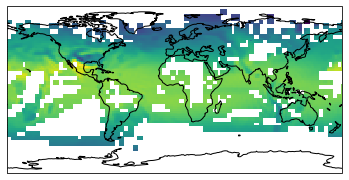

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.pcolormesh(mpi_tas.lon, mpi_tas.lat, available_obs_mask[1000])

In [16]:
#plt.pcolormesh((available_obs_mask*0+1)[1500])